In [2]:
import pandas as pd
import random
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import geopandas as gpd

In [3]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(15, 8)})

In [4]:
enem_df = pd.read_csv(
    'MICRODADOS_ENEM_2019.csv',
    header=0,
    encoding = "ISO-8859-1",
    skiprows=lambda i: i > 0 and random.random() > 0.01,
    sep=';'
)

In [5]:
enem_df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001409449,2019,2801009,Campo do Brito,28,SE,19,M,1,2,...,A,A,A,B,A,A,B,A,A,A
1,190001042838,2019,1501402,Belém,15,PA,21,F,1,3,...,A,A,A,B,B,A,B,A,A,A
2,190001237819,2019,3106200,Belo Horizonte,31,MG,18,F,1,0,...,B,A,A,C,B,B,E,B,B,B
3,190001133224,2019,2307304,Juazeiro do Norte,23,CE,41,F,1,1,...,B,A,A,B,B,A,B,B,A,B
4,190001658317,2019,3201308,Cariacica,32,ES,45,F,2,2,...,A,A,A,B,B,A,B,A,A,A


# Separando as colunas das notas

In [6]:
grades = ['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
enem_df[grades].head()

,NU_NOTA_LC,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_MT,NU_NOTA_REDACAO
0,521.3,545.7,468.8,412.3,800.0
1,550.0,554.7,395.1,406.4,560.0
2,606.0,647.2,585.3,720.5,960.0
3,545.5,553.5,402.9,389.6,620.0
4,509.2,563.9,473.4,554.9,600.0


# Retirando valores nulos 

In [7]:
enem_df[grades].isnull().sum()

NU_NOTA_LC         11757
NU_NOTA_CH         11757
NU_NOTA_CN         13846
NU_NOTA_MT         13846
NU_NOTA_REDACAO    11757
dtype: int64

In [8]:
enem_df.dropna(inplace=True)

# Calculando a média geral de cada candidato

In [9]:
enem_df['NU_NOTA_GERAL'] = enem_df[grades].sum(axis=1) / 5

grades = ['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'NU_NOTA_GERAL']

pd.DataFrame(enem_df['NU_NOTA_GERAL'].head(10))

,NU_NOTA_GERAL
2,703.80
8,656.60
11,493.38
15,575.92
26,618.32
34,443.00
39,539.40
40,478.58
46,587.90
50,693.02


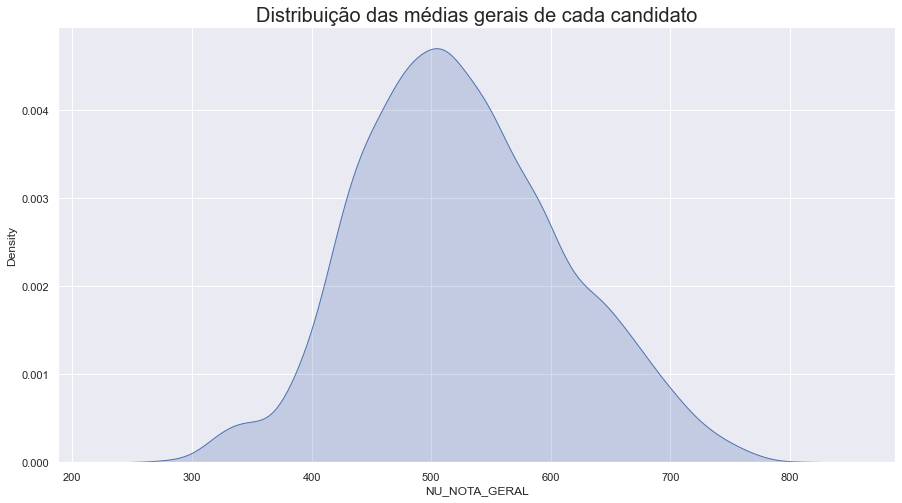

In [10]:
sns.kdeplot(data=enem_df['NU_NOTA_GERAL'], fill=True, palette="Spectral")

plt.title('Distribuição das médias gerais de cada candidato', fontsize=20)
plt.show()

 Muito parecido com uma curva de distribuição normal ou Gaussiana!

# Distribuição das notas de cada área do conhecimento

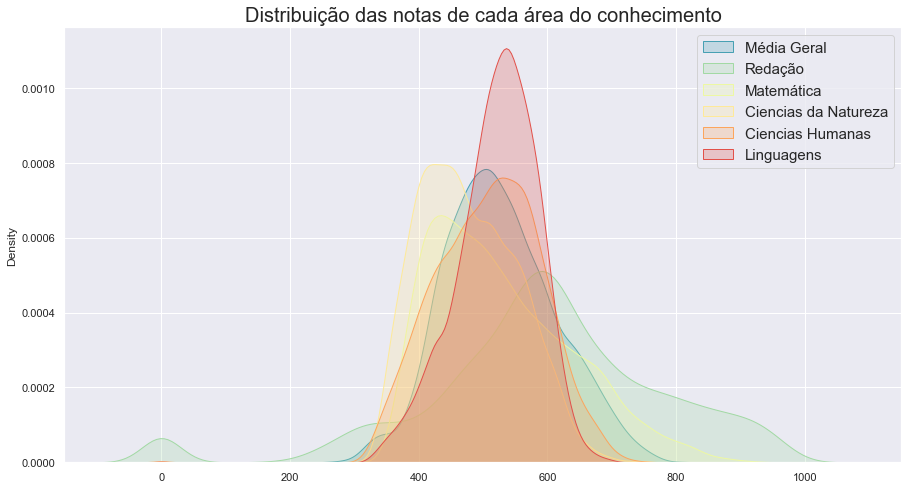

In [11]:
sns.kdeplot(data=enem_df[grades], fill=True, palette="Spectral")

plt.legend(['Média Geral', 'Redação', 'Matemática', 'Ciencias da Natureza', 'Ciencias Humanas', 'Linguagens'], fontsize=15)
plt.title('Distribuição das notas de cada área do conhecimento', fontsize=20)
plt.show()

# Comparando as notas de cada área com a média geral

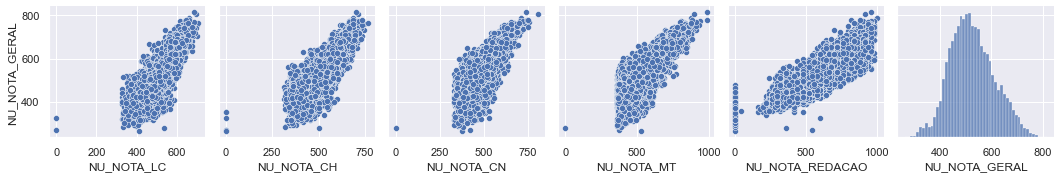

In [12]:
sns.pairplot(enem_df[grades], y_vars='NU_NOTA_GERAL')
plt.show()

# Comparando o desempenho geral com o gênero

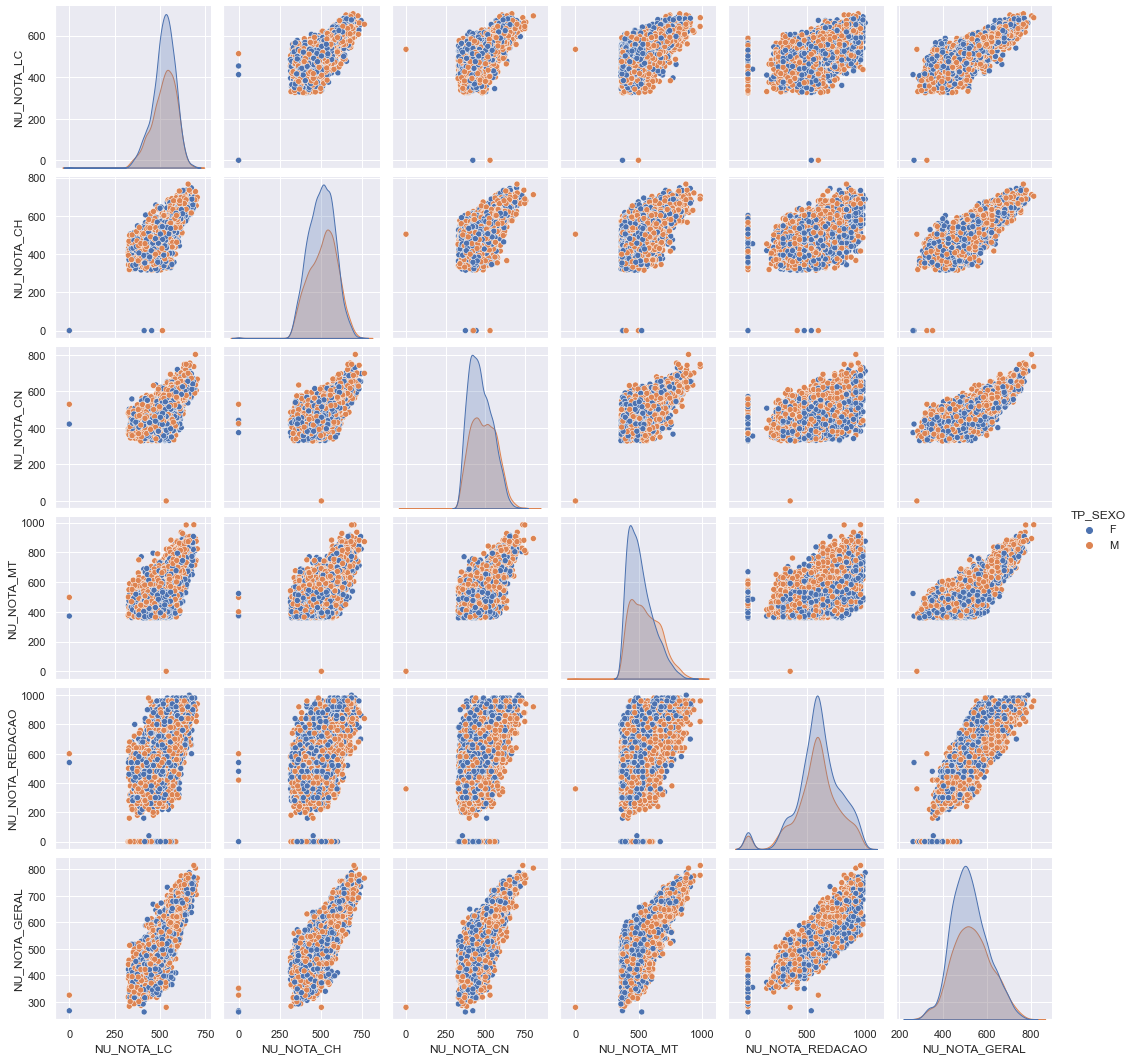

In [13]:
grades_vs_gender = ['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'NU_NOTA_GERAL', 'TP_SEXO']
sns.pairplot(enem_df[grades_vs_gender], hue='TP_SEXO')

plt.show()

# Verificando correlação entre o desempenho nas áreas 

A função .corr(), no modo padrão, calcula a correlação através do método Pearson. O coeficiente de Pearson varia de 1 a -1. Sendo:

1: correlação perfeita e positiva entre as variáveis

0: não existe correlação linear entre as variáveis

-1: correlação perfeita e negativa entre as variáveis

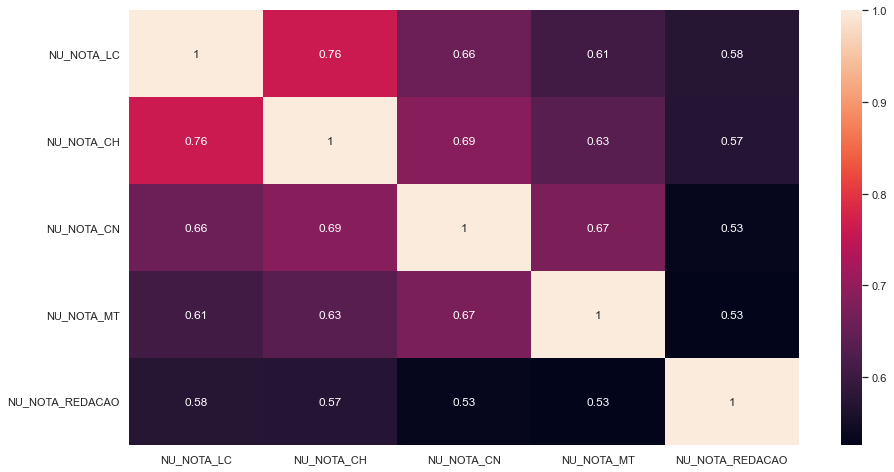

In [14]:
correlation_df = enem_df[['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].corr()

sns.heatmap(correlation_df, annot=True)
plt.show()

# Extraindo dados do Geopackage 

In [15]:
ufs_df = gpd.read_file('bcim_2016_21_11_2018.gpkg', layer='lim_unidade_federacao_a')
ufs_df.head()

,nome,nomeabrev,geometriaaproximada,sigla,geocodigo,id_produtor,id_elementoprodutor,cd_insumo_orgao,nr_insumo_mes,nr_insumo_ano,tx_insumo_documento,geometry
0,Goiás,None,Sim,GO,52,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743..."
1,Mato Grosso do Sul,None,Sim,MS,50,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-56.09815 -17.17220, -56.09159..."
2,Paraná,None,Sim,PR,41,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-52.08090 -22.52893, -52.04903..."
3,Minas Gerais,None,Sim,MG,31,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-44.21152 -14.22955, -44.20750..."
4,Sergipe,None,Sim,SE,28,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ..."


In [17]:
NOTA_UF = enem_df[['NU_NOTA_GERAL', 'SG_UF_RESIDENCIA']].copy()
NOTA_UF = NOTA_UF.groupby(by='SG_UF_RESIDENCIA').mean()
NOTA_UF

ufs_df.rename({'sigla': 'SG_UF_RESIDENCIA'}, axis=1, inplace=True)
ufs_df

BRASIL = ufs_df.merge(NOTA_UF, on='SG_UF_RESIDENCIA', how='left')

BRASIL[['SG_UF_RESIDENCIA', 'NU_NOTA_GERAL', 'geometry']].head()

,SG_UF_RESIDENCIA,NU_NOTA_GERAL,geometry
0,GO,532.851792,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743..."
1,MS,530.976147,"MULTIPOLYGON (((-56.09815 -17.17220, -56.09159..."
2,PR,533.158343,"MULTIPOLYGON (((-52.08090 -22.52893, -52.04903..."
3,MG,543.655966,"MULTIPOLYGON (((-44.21152 -14.22955, -44.20750..."
4,SE,520.955484,"MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ..."


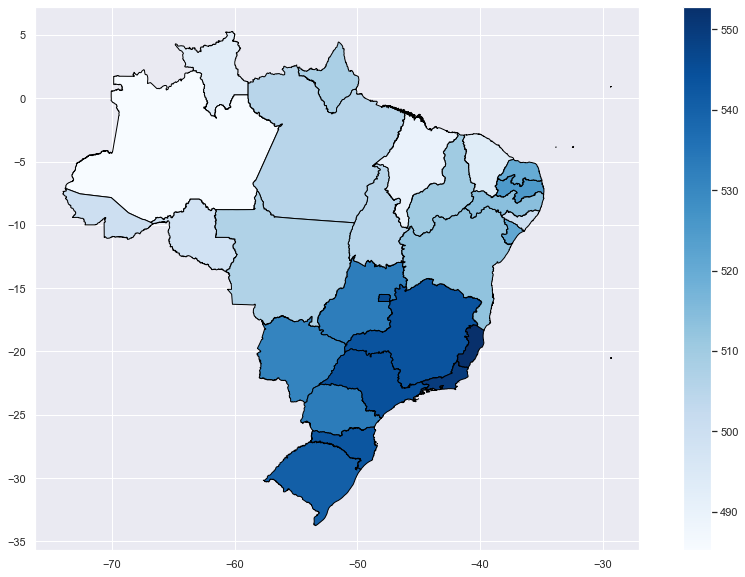

In [19]:
BRASIL.plot(column='NU_NOTA_GERAL',
          cmap='Blues',
          figsize=(16,10),
          legend=True,
          edgecolor='black')

plt.show()